In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
city_rides = pd.merge(city_df, ride_df, on='city')

# Display the data table for preview
city_rides.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#city_rides['type'].unique()
#Urban
urban_city_rides = city_rides.loc[city_rides['type'] == 'Urban', ['fare', 'driver_count', 'ride_id', 'city']]
#print(urban_city_rides.head())
city_urban_grp = urban_city_rides.groupby(['city'])
city_urban_df = pd.DataFrame(city_urban_grp.agg({'fare' : 'mean'
                   , 'ride_id' : 'count'
                   , 'driver_count' : 'sum'
                   }))
#print(city_urban_df)
city_urban_df = city_urban_df.rename(columns={'fare' : 'avg_fare'
                                             , 'ride_id' : "num_rides"
                                             , 'driver_count' : "num_drivers"})

#Suburban
suburban_city_rides = city_rides.loc[city_rides['type'] == 'Suburban', ['fare', 'driver_count', 'ride_id', 'city']]
#print(suburban_city_rides.head())

city_suburban_grp = suburban_city_rides.groupby(['city'])
city_suburban_df = pd.DataFrame(city_suburban_grp.agg({'fare' : 'mean'
                   , 'ride_id' : 'count'
                   , 'driver_count' : 'sum'
                   }))
city_suburban_df = city_suburban_df.rename(columns={'fare' : 'avg_fare'
                                             , 'ride_id' : "num_rides"
                                             , 'driver_count' : "num_drivers"})


#Rural
rural_city_rides = city_rides.loc[city_rides['type'] == 'Rural', ['fare', 'driver_count', 'ride_id', 'city']]
\
city_rural_grp = rural_city_rides.groupby(['city'])
city_rural_df = pd.DataFrame(city_rural_grp.agg({'fare' : 'mean'
                   , 'ride_id' : 'count'
                   , 'driver_count' : 'sum'
                   }))
city_rural_df = city_rural_df.rename(columns={'fare' : 'avg_fare'
                                             , 'ride_id' : "num_rides"
                                             , 'driver_count' : "num_drivers"})

#print(city_urban_df.head())
#print(city_suburban_df.head())
#print(city_rural_df.head())

## Bubble Plot of Ride Sharing Data

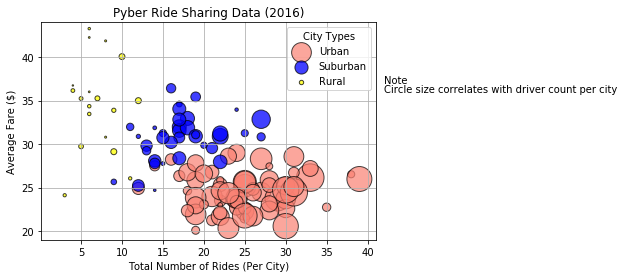

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_x_axis = city_urban_df['num_rides']
urban_y_axis = city_urban_df['avg_fare']
urban_s = city_urban_df['num_drivers']

suburban_x_axis = city_suburban_df['num_rides']
suburban_y_axis = city_suburban_df['avg_fare']
suburban_s = city_suburban_df['num_drivers']

rural_x_axis = city_rural_df['num_rides']
rural_y_axis = city_rural_df['avg_fare']
rural_s = city_rural_df['num_drivers']

# Build the scatter plots for each city types
plt.scatter(urban_x_axis, urban_y_axis, facecolors="salmon", edgecolors="black", s=urban_s/3, alpha=0.7, label='Urban')
plt.scatter(suburban_x_axis, suburban_y_axis, facecolors="blue", edgecolors="black", s=suburban_s/2, alpha=0.75, label='Suburban')
plt.scatter(rural_x_axis, rural_y_axis, facecolors="yellow", edgecolors="black", s=rural_s/2, alpha=0.75, label='Rural')

# Incorporate the other graph properties
plt.grid()
plt.xlim(0.1, 41)
plt.ylim(19, 44)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
plt.legend(loc='best', title='City Types')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Incorporate a text label regarding circle size
plt.text(42, 37, 'Note')
plt.text(42, 36, 'Circle size correlates with driver count per city')

# Save Figure
plt.savefig('Output/Pyber_RidesPerCity_by_AvgFare.png')


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

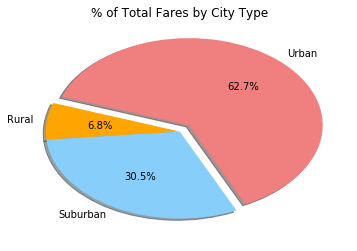

In [5]:
# Calculate Type Percents

city_urban_pie = urban_city_rides['fare'].sum()

city_suburban_pie = suburban_city_rides['fare'].sum()

city_rural_pie = rural_city_rides['fare'].sum()

#print(city_urban_pie)


# Build Pie Chart

city_types = ["Urban", "Rural", "Suburban"]
total_fares = [city_urban_pie, city_rural_pie, city_suburban_pie]
colors = ["lightcoral", "orange", "lightskyblue"]
explode = (0.1,0,0)

plt.pie(total_fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-65)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Output/Pyber_Total_Fares_by_City_Type.png')


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

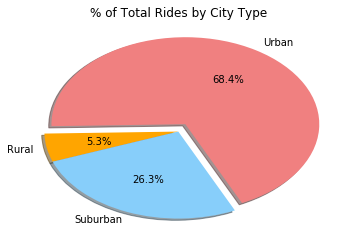

In [7]:
# Calculate Ride Percents

city_urban_pie = urban_city_rides['fare'].count()

city_suburban_pie = suburban_city_rides['fare'].count()

city_rural_pie = rural_city_rides['fare'].count()



# Build Pie Chart

city_types = ["Urban", "Rural", "Suburban"]
total_fares = [city_urban_pie, city_rural_pie, city_suburban_pie]
colors = ["lightcoral", "orange", "lightskyblue"]
explode = (0.1,0,0)

plt.pie(total_fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-65)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Output/Pyber_Total_Rides_by_City_Type.png')


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

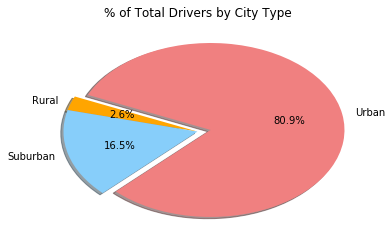

In [9]:
# Calculate Driver Percents

urban_driver_df = city_df.loc[city_df['type'] == 'Urban', ['driver_count']]
urban_driver_cnt = urban_driver_df['driver_count'].sum()

suburban_driver_df = city_df.loc[city_df['type'] == 'Suburban', ['driver_count']].sum()
suburban_driver_cnt = suburban_driver_df['driver_count'].sum()

rural_driver_df = city_df.loc[city_df['type'] == 'Rural', ['driver_count']].sum()
rural_driver_cnt = rural_driver_df['driver_count'].sum()

# Build Pie Charts
city_types = ["Urban", "Rural", "Suburban"]
driver_cnt = [urban_driver_cnt, rural_driver_cnt, suburban_driver_cnt]
colors = ["lightcoral", "orange", "lightskyblue"]
explode = (0.1,0,0)

plt.pie(driver_cnt, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-135)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Output/Pyber_Total_Drivers_by_City_Type.png')


In [10]:
# Show Figure
plt.show()